In [7]:
import pandas as pd


# Load the datasets
customers = pd.read_csv('/Users/emanuelpoblano/Desktop/e-commerce-sales-and-customer-analysis/ecommerce-analysis/data/raw/customers.csv', parse_dates=['signup_date'])
products = pd.read_csv('/Users/emanuelpoblano/Desktop/e-commerce-sales-and-customer-analysis/ecommerce-analysis/data/raw/products.csv')
orders = pd.read_csv('/Users/emanuelpoblano/Desktop/e-commerce-sales-and-customer-analysis/ecommerce-analysis/data/raw/orders.csv', parse_dates=['order_date'])
order_items = pd.read_csv('/Users/emanuelpoblano/Desktop/e-commerce-sales-and-customer-analysis/ecommerce-analysis/data/raw/order_items.csv')

# Confirm successful loading
print("Datasets loaded successfully.")
print('============Data Shape===============')
# Display the shape of each dataset
print(customers.shape, orders.shape, order_items.shape, products.shape)

# Data Inspection
print('============Data Inspection==========')
print('============Customers================')
customers.info()

print('============Orders==================')
orders.info()

print('============Products=================')
products.info()

print('============Order Items==============')
order_items.info()


Datasets loaded successfully.
============Data Shape===============
(500, 3) (1200, 4) (2949, 4) (20, 3)
============Data Inspection==========
============Customers================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  500 non-null    object        
 1   signup_date  500 non-null    datetime64[ns]
 2   country      470 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 11.8+ KB
============Orders==================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      1200 non-null   object        
 1   customer_id   1200 non-null   object        
 2   order_date    1200 non-null   datetime64[ns]
 3   order_status

In [44]:
# Check for missing values

customers.isna().sum()


customer_id     0
signup_date     0
country        30
dtype: int64

In [45]:
# Check for missing values
orders.isna().sum()

order_id        0
customer_id     0
order_date      0
order_status    0
dtype: int64

In [46]:
# Check for missing values
products.isna().sum()

product_id      0
product_name    0
category        0
dtype: int64

In [47]:
# Check for missing values
order_items.isna().sum()

order_id      0
product_id    0
quantity      0
price         0
dtype: int64

In [53]:
# Data Cleaning

# Remove duplicate orders if any
orders = orders.drop_duplicates(subset='order_id')

# Filter by completed orders
orders = orders[orders['order_status'] == 'completed']

# Handle missing country
customers['country'] = customers['country'].fillna('Unknown')




In [18]:
# Merge datasets
df = (
    orders
        .merge(order_items, on='order_id', how='left') 
        .merge(products, on='product_id', how='left') 
        .merge(customers, on='customer_id', how='left')
)

# Revenue calculation
df['revenue'] = df['price'] * df['quantity']

# Display the first few rows of the final dataframe
print(df.head())

  order_id customer_id order_date order_status product_id  quantity  price  \
0  ORD2000    CUST1340 2023-12-19    completed      PROD6         2  39.99   
1  ORD2000    CUST1340 2023-12-19    completed      PROD7         3  34.99   
2  ORD2001    CUST1281 2023-10-14    completed      PROD5         3  44.99   
3  ORD2001    CUST1281 2023-10-14    completed      PROD8         1  29.99   
4  ORD2002    CUST1062 2023-09-03    cancelled     PROD11         3  39.99   

        product_name     category signup_date country  revenue  
0  Corner Pocket Hat         Hats  2023-01-11      CA    79.98  
1        Lucky 7 Hat  Accessories  2023-01-11      CA   104.97  
2    Pocket King Hat         Hats  2023-07-08      US   134.97  
3       Blackout Hat  Accessories  2023-07-08      US    29.99  
4     Chalk Logo Hat         Hats  2023-10-06      UK   119.97  


In [22]:
# Date features
df['order_month'] = df['order_date'].dt.to_period('M')
df['order_year'] = df['order_date'].dt.year


In [62]:
# Key metrics
total_revenue = df['revenue'].sum()
print(f'Total Revenue: ${total_revenue:,.2f}')

# Total orders
total_orders = df['order_id'].nunique()
print(f'Total Orders: {total_orders}')

# Average order value
average_order_value = total_revenue / total_orders
print(f'Average Order Value: ${average_order_value:,.2f}')


Total Revenue: $206,904.80
Total Orders: 1120
Average Order Value: $184.74


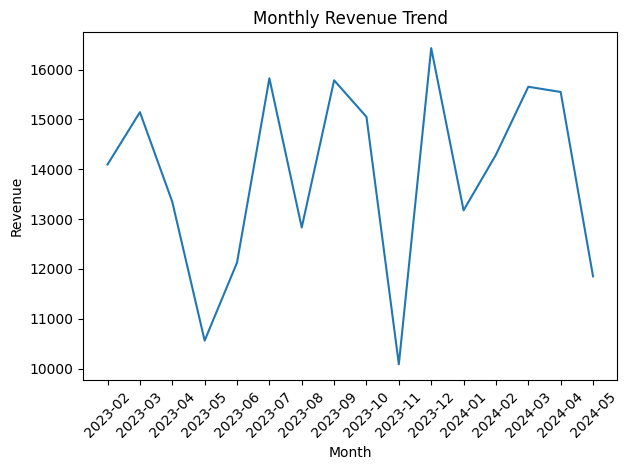

In [23]:
import matplotlib.pyplot as plt
# Monthly revenue trend
monthly_revenue = (
    df.groupby('order_month')['revenue']
    .sum()
    .reset_index()
)


monthly_revenue['order_month'] = monthly_revenue['order_month'].astype(str)

plt.figure()
plt.plot(monthly_revenue['order_month'], monthly_revenue['revenue'])
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

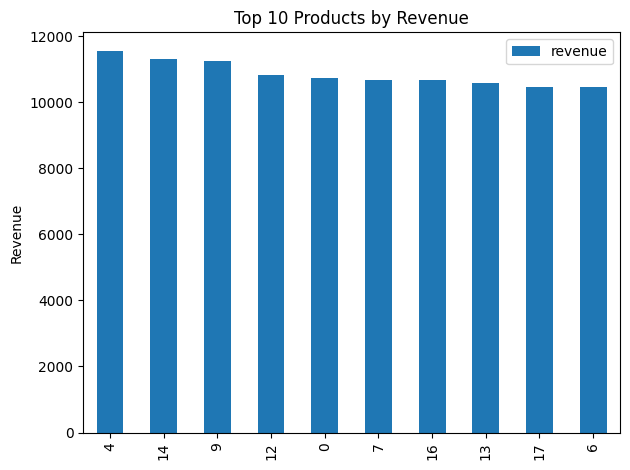

In [75]:
# Top products by revenue
top_products = (
    df.groupby('product_name')['revenue']
    .sum()
    .reset_index()
    .sort_values(by='revenue', ascending=False)
    .head(10)
)

plt.figure()
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [76]:
# Revenue by category
category_revenue = (
    df.groupby('category')['revenue']
    .sum()
)
print(category_revenue)

category
Accessories     82133.05
Hats           124771.75
Name: revenue, dtype: float64


In [11]:
# Customer analysis 
customer_orders = df.groupby('customer_id')['order_id'].nunique()


repeat_customer_rate = (customer_orders > 1).mean()
print(f"Repeat Customer Rate: {repeat_customer_rate:.2%}")

print('============Top Customers=============')
# Top customers
customer_revenue = (
df.groupby('customer_id')['revenue']
.sum()
.sort_values(ascending=False)
.head(10)
)
print(customer_revenue)


Repeat Customer Rate: 75.56%
============Top Customers=============
customer_id
CUST1434    1669.58
CUST1475    1609.59
CUST1477    1574.59
CUST1110    1544.56
CUST1292    1504.60
CUST1228    1504.59
CUST1310    1469.63
CUST1226    1444.63
CUST1024    1434.65
CUST1317    1404.64
Name: revenue, dtype: float64


In [12]:
# Country Level Analysis
country_revenue = (
df.groupby('country')['revenue']
.sum()
.sort_values(ascending=False)
)
print(country_revenue)

country
US    101438.03
CA     35825.45
MX     30621.82
DE     23553.74
UK     19189.80
Name: revenue, dtype: float64


In [13]:
# Summary of Findings
# - Small % of customers drive majority of revenue
# - Repeat customers spend significantly more
# - Clear seasonality in monthly revenue

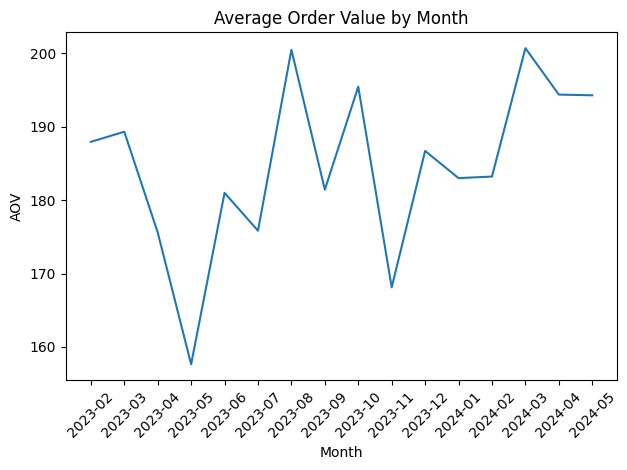

In [24]:
# Advanced Charts
# Average Order Value by Month



aov_monthly = (
    df.groupby('order_month')
    .apply(lambda x: x['revenue'].sum() / x['order_id'].nunique())
    .reset_index(name='aov')
)

aov_monthly['order_month'] = aov_monthly['order_month'].astype(str)

plt.figure()
plt.plot(aov_monthly['order_month'], aov_monthly['aov'])
plt.xticks(rotation=45)
plt.title('Average Order Value by Month')
plt.xlabel('Month')
plt.ylabel('AOV')
plt.tight_layout()
plt.show()

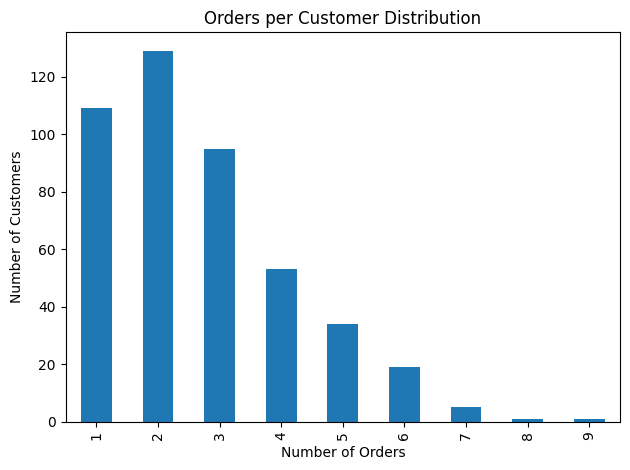

In [25]:
# Orders per Customer Distribution
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()


plt.figure()
orders_per_customer.value_counts().sort_index().plot(kind='bar')
plt.title('Orders per Customer Distribution')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [26]:
# Revenue Contribution by Top 20% Customers
customer_rev = df.groupby('customer_id')['revenue'].sum().sort_values(ascending=False)
top_20_cutoff = int(len(customer_rev) * 0.2)
revenue_share_top_20 = customer_rev.head(top_20_cutoff).sum() / customer_rev.sum()


print(f"Top 20% of customers generate {revenue_share_top_20:.2%} of revenue")

Top 20% of customers generate 41.81% of revenue


In [ ]:
# INSIGHTS:
# 1. Revenue shows clear monthly seasonality with strong peak periods.
# 2. A small percentage of customers contribute a majority of total revenue.
# 3. Repeat customers have significantly higher lifetime spend than one-time buyers.
# 4. Average Order Value remains stable with occasional promotional spikes.
# 5. Hats dominate revenue compared to accessories.


# RECOMMENDATIONS:
# - Invest in retention campaigns for high-value customers.
# - Prepare inventory ahead of high-revenue months.
# - Bundle accessories with top-selling hats to increase AOV.


# ===============================


# - Small % of customers drive majority of revenue
# - Repeat customers spend significantly more
# - Clear seasonality in monthly revenue

In [16]:
# Save the cleaned and merged dataset
df.to_csv('/Users/emanuelpoblano/Desktop/e-commerce-sales-and-customer-analysis/ecommerce-analysis/data/cleaned/cleaned.csv', index=False)


print('Cleaned dataset saved.')

Cleaned dataset saved.
